In [1]:
import pandas as pd
import glob

# Get a list of all CSV files 
file_list = glob.glob('./Tweets/*.CSV')

# Store DataFrames
dfs = []

# Iterate over each file and read it into a DataFrame
for file in file_list:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
combined_df.shape

(5964653, 22)

In [2]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1250937015840804864,544900497,2020-04-17T00:00:00Z,_wheresmymojo,Math Formulas And Numbers On Blackboard Cloth ...,TweetDeck,NaN,NaN,NaN,False,False,7129,0,NaN,NaN,NaN,406,271,NaN,2012-04-04T03:52:50Z,False,en
1,1250937015744581634,127591568,2020-04-17T00:00:00Z,Huauchifm,🎯#Ahora te traemos la rueda de prensa del @Gob...,TweetDeck,NaN,NaN,NaN,False,False,1576,0,NaN,NaN,NaN,1530,861,NaN,2010-03-29T17:54:07Z,False,es
2,1250937016428032002,127599939,2020-04-17T00:00:00Z,ZacatlanFM,🎯#Ahora te traemos la rueda de prensa del @Gob...,TweetDeck,NaN,NaN,NaN,False,False,13860,0,NaN,NaN,NaN,2000,1416,NaN,2010-03-29T18:14:44Z,False,es
3,1250937015572414464,128124996,2020-04-17T00:00:00Z,Izucar_fm,🎯#Ahora te traemos la rueda de prensa del @Gob...,TweetDeck,NaN,NaN,NaN,False,False,610,0,NaN,NaN,NaN,1153,167,NaN,2010-03-31T04:56:31Z,False,es
4,1250937015002152961,314210521,2020-04-17T00:00:00Z,TehuacanFM,🎯#Ahora te traemos la rueda de prensa del @Gob...,TweetDeck,NaN,NaN,NaN,False,False,4538,0,NaN,NaN,NaN,2199,114,NaN,2011-06-09T21:58:36Z,False,es


In [3]:
df.columns

Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'country_code', 'place_full_name', 'place_type', 'followers_count',
       'friends_count', 'account_lang', 'account_created_at', 'verified',
       'lang'],
      dtype='object')

### Check with rows are useful for Tweet ingestion

In [4]:
nonretweetrows = df[df['is_retweet'] == True]

# Print some sample rows
print("Sample rows where 'is_retweet' is True:")
nonretweetrows.head()

Sample rows where 'is_retweet' is True:


,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang


In [5]:
retweetcount = df[df['retweet_count'] > 0]

# Print some sample rows
print("Sample rows where 'is_retweet' is True:")
retweetcount.head()

Sample rows where 'is_retweet' is True:


,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
9,1250937014951821315,1042498579909107712,2020-04-17T00:00:00Z,ContraReplicaMX,"En lo que ha transcurrido del 2020, el 86.8% d...",TweetDeck,NaN,NaN,NaN,False,False,5756,1,NaN,NaN,NaN,13473,2556,NaN,2018-09-19T19:40:04Z,False,es
10,1250937014838603776,4132841,2020-04-17T00:00:00Z,mcleod,WHERE ARE THE TESTS? \n#trumpvirus #coronaviru...,Buffer,NaN,NaN,NaN,True,False,5204,1,NaN,NaN,NaN,54016,8819,NaN,2007-04-11T06:19:46Z,False,en
12,1250937017271119873,214670199,2020-04-17T00:00:00Z,NOTICIEROS7,"#SLP Xavier Nava supervisa acciones de ""Tenemo...",TweetDeck,NaN,NaN,NaN,False,False,51,8,NaN,NaN,NaN,29672,1589,NaN,2010-11-11T23:28:46Z,False,es
16,1250937016495116288,253053805,2020-04-17T00:00:00Z,CSSPanama,"El servicio de farmacia de la policlínica ""Dr....",TweetDeck,NaN,NaN,NaN,False,False,1395,3,NaN,NaN,NaN,97072,1205,NaN,2011-02-16T13:20:19Z,False,es
18,1250937014620471297,296005306,2020-04-17T00:00:00Z,telesurenglish,The epidemiological situation in #Argentina pr...,TweetDeck,NaN,NaN,NaN,False,False,3,9,NaN,NaN,NaN,107029,4140,NaN,2011-05-10T01:28:09Z,False,en


In [6]:
countrycode_na = df[df['country_code'].notna()]

# Print some sample values
print("Sample values where 'reply_to_user_id' has some value:")
countrycode_na.head()

Sample values where 'reply_to_user_id' has some value:


,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
215,1250937043334713350,994936765264859136,2020-04-17T00:00:07Z,__Korshiedablog,The NiMA lifestyle EP by the man himself @shat...,Twitter for iPhone,NaN,NaN,NaN,False,False,3183,1,GH,"Tema, Ghana",city,584,1482,NaN,2018-05-11T13:46:24Z,False,en
233,1250937056257245187,1340146908,2020-04-17T00:00:10Z,doclourda,Thank you for your support for all our health ...,Twitter for iPad,NaN,NaN,NaN,True,False,6845,0,GB,"Newtownards, Northern Ireland",city,927,1004,NaN,2013-04-09T20:42:25Z,False,en
281,1250937085676093442,113729911,2020-04-17T00:00:17Z,BLUE_Arq_Ing,Empiezo a tener sueños “confitados” en los que...,Twitter for iPhone,NaN,NaN,NaN,False,False,4948,0,ES,"Algeciras, Spain",city,527,943,NaN,2010-02-12T21:05:07Z,False,es
298,1250937094127734786,757350856316497920,2020-04-17T00:00:19Z,TrapTVShow,Scientists have found something very disturbin...,Twitter for Android,NaN,NaN,NaN,False,False,40321,0,US,"Houston, TX",city,399,946,NaN,2016-07-24T23:04:50Z,False,en
304,1250937099634737152,1048004556041404416,2020-04-17T00:00:20Z,KatKarnakis,#StayHomeStaySafe everyone!! Have a peaceful e...,Twitter for iPhone,NaN,NaN,NaN,False,False,3329,2,BS,Island Seas Resort,poi,145,144,NaN,2018-10-05T00:18:51Z,False,en


In [7]:
countrycode_na.shape

(22558, 22)

In [8]:
df.shape

(509643, 22)

In [9]:
countrycode_na = df[df['country_code'].notna()]

# Print some sample values
print("Sample values where 'reply_to_user_id' has some value:")
# countrycode_na.head()
countrycode_na.shape

Sample values where 'reply_to_user_id' has some value:


(22558, 22)

In [10]:
verifiedacc = df[df['verified'] == True]

# Print some sample rows
print("Sample rows where 'verified' is True:")
verifiedacc.head()

Sample rows where 'verified' is True:


,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
13,1250937017023827968,44728980,2020-04-17T00:00:00Z,ANCALERTS,ANC's The Boss will look into how business lea...,TweetDeck,NaN,NaN,NaN,False,False,5449,0,NaN,NaN,NaN,4916474,775,NaN,2009-06-04T21:26:24Z,True,en
22,1250937017485029376,838354118,2020-04-17T00:00:00Z,Jaime_BonillaV,#SaludEnCasa | Para ayudar los sectores más ne...,TweetDeck,NaN,NaN,NaN,False,False,2023,0,NaN,NaN,NaN,81355,58,NaN,2012-09-21T18:36:48Z,True,es
24,1250937016084201473,119084981,2020-04-17T00:00:00Z,ExaFM,¡Ya comienza la #ConferenciaDePrensa: #Coronav...,TweetDeck,NaN,NaN,NaN,False,False,6000,0,NaN,NaN,NaN,625288,368,NaN,2010-03-02T16:38:26Z,True,es
25,1250937016738512898,92174767,2020-04-17T00:00:00Z,DZMMTeleRadyo,Hindi dapat sisihin ang mga Filipino sa patulo...,TweetDeck,NaN,NaN,NaN,False,False,578,5,NaN,NaN,NaN,1372522,161,NaN,2009-11-24T02:03:16Z,True,tl
26,1250937017816330241,615314107,2020-04-17T00:00:00Z,alain_4u,#اليونان تنقل المئات من طالبي اللجوء المسنين أ...,TweetDeck,NaN,NaN,NaN,False,False,147,5,NaN,NaN,NaN,386378,13,NaN,2012-06-22T16:20:43Z,True,ar


In [11]:
verifiedacc.shape

(56365, 22)

### Drop unecessary rows for final df Tweet

In [12]:
# dropping columns
tweet = df.copy()
tweet.drop(['source','reply_to_screen_name','is_retweet','is_quote','followers_count','friends_count','account_lang','account_created_at'],axis=1, inplace = True)
tweet.head()

,status_id,user_id,created_at,screen_name,text,reply_to_status_id,reply_to_user_id,favourites_count,retweet_count,country_code,place_full_name,place_type,verified,lang
0,1250937015840804864,544900497,2020-04-17T00:00:00Z,_wheresmymojo,Math Formulas And Numbers On Blackboard Cloth ...,NaN,NaN,7129,0,NaN,NaN,NaN,False,en
1,1250937015744581634,127591568,2020-04-17T00:00:00Z,Huauchifm,🎯#Ahora te traemos la rueda de prensa del @Gob...,NaN,NaN,1576,0,NaN,NaN,NaN,False,es
2,1250937016428032002,127599939,2020-04-17T00:00:00Z,ZacatlanFM,🎯#Ahora te traemos la rueda de prensa del @Gob...,NaN,NaN,13860,0,NaN,NaN,NaN,False,es
3,1250937015572414464,128124996,2020-04-17T00:00:00Z,Izucar_fm,🎯#Ahora te traemos la rueda de prensa del @Gob...,NaN,NaN,610,0,NaN,NaN,NaN,False,es
4,1250937015002152961,314210521,2020-04-17T00:00:00Z,TehuacanFM,🎯#Ahora te traemos la rueda de prensa del @Gob...,NaN,NaN,4538,0,NaN,NaN,NaN,False,es


In [13]:
tweet.shape

(509643, 14)

In [14]:
tweet = tweet.drop_duplicates(subset=['status_id'])
tweet.shape

(509604, 14)

### Drop unecessary rows for final df Users

In [15]:
df.columns

Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'country_code', 'place_full_name', 'place_type', 'followers_count',
       'friends_count', 'account_lang', 'account_created_at', 'verified',
       'lang'],
      dtype='object')

In [16]:
# dropping columns
users = df.copy()
users.drop(['status_id','created_at', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'country_code', 'place_full_name', 'place_type','lang'],axis=1, inplace = True)
users.head()

,user_id,screen_name,followers_count,friends_count,account_lang,account_created_at,verified
0,544900497,_wheresmymojo,406,271,NaN,2012-04-04T03:52:50Z,False
1,127591568,Huauchifm,1530,861,NaN,2010-03-29T17:54:07Z,False
2,127599939,ZacatlanFM,2000,1416,NaN,2010-03-29T18:14:44Z,False
3,128124996,Izucar_fm,1153,167,NaN,2010-03-31T04:56:31Z,False
4,314210521,TehuacanFM,2199,114,NaN,2011-06-09T21:58:36Z,False


In [17]:
users.shape

(509643, 7)

In [18]:
users = users.drop_duplicates(subset=['user_id'])

In [19]:
users.shape

(298549, 7)

In [20]:
lang_values = tweet['lang'].unique()
lang_values

array(['en', 'es', 'tl', 'ar', 'th', 'pt', 'hu', 'uk', 'und', 'fr', 'ja',
       'eu', 'ko', 'it', 'de', 'in', 'hi', 'ru', 'lt', 'ht', 'cy', 'tr',
       'ca', 'et', 'da', 'pl', 'sr', 'ne', 'sv', 'zh', 'ur', 'el', 'fa',
       'vi', 'nl', 'ta', 'ro', 'is', 'fi', 'mr', 'bn', 'ps', 'dv', 'ml',
       'te', 'kn', 'pa', 'si', 'gu', 'no', 'sd', 'or', 'cs', 'lv', 'sl',
       'ckb', 'bg', 'my', 'km', 'hy', 'iw', 'am', 'ka'], dtype=object)

In [21]:
len(lang_values)

63

In [22]:
import pandas as pd

# Unique languages
uniquelang = tweet['lang'].unique()

langcounts = {}

for lang in uniquelang:
    langcount = (df['lang'] == lang).sum() # number of rows for each lang
    langcounts[lang] = langcount

for lang, count in langcounts.items():
    print(f"Language: {lang}, Count: {count}")


Language: en, Count: 282526
Language: es, Count: 80771
Language: tl, Count: 1385
Language: ar, Count: 3417
Language: th, Count: 2610
Language: pt, Count: 9417
Language: hu, Count: 113
Language: uk, Count: 956
Language: und, Count: 24283
Language: fr, Count: 30335
Language: ja, Count: 4946
Language: eu, Count: 220
Language: ko, Count: 111
Language: it, Count: 14432
Language: de, Count: 8604
Language: in, Count: 6925
Language: hi, Count: 9593
Language: ru, Count: 1482
Language: lt, Count: 65
Language: ht, Count: 226
Language: cy, Count: 147
Language: tr, Count: 5377
Language: ca, Count: 4510
Language: et, Count: 536
Language: da, Count: 296
Language: pl, Count: 1200
Language: sr, Count: 61
Language: ne, Count: 376
Language: sv, Count: 441
Language: zh, Count: 512
Language: ur, Count: 2046
Language: el, Count: 998
Language: fa, Count: 384
Language: vi, Count: 67
Language: nl, Count: 3063
Language: ta, Count: 1988
Language: ro, Count: 398
Language: is, Count: 26
Language: fi, Count: 332
La

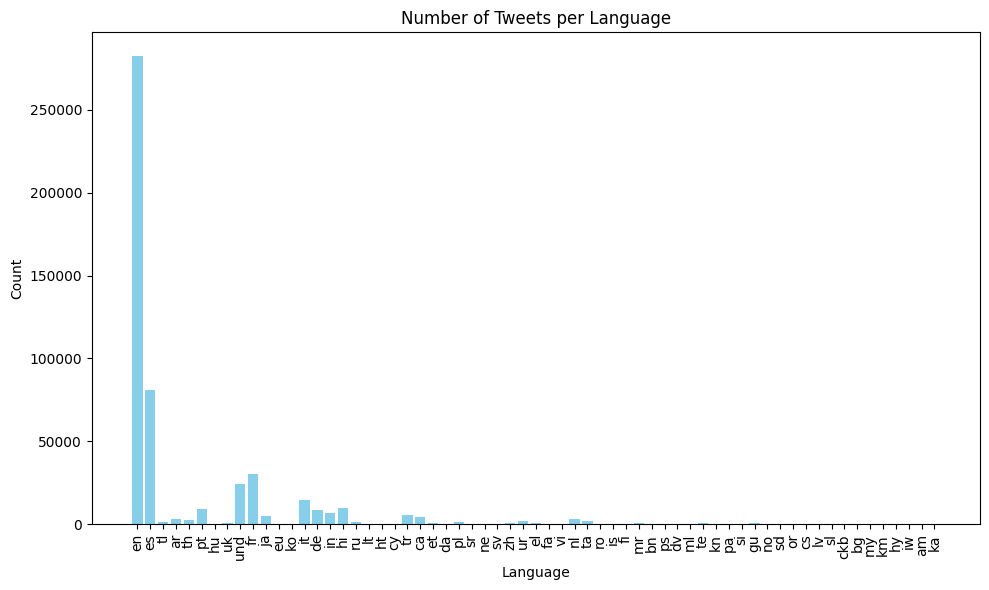

In [23]:
import matplotlib.pyplot as plt

languages = list(langcounts.keys())
counts = list(langcounts.values())

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(languages, counts, color='skyblue')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Number of Tweets per Language')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

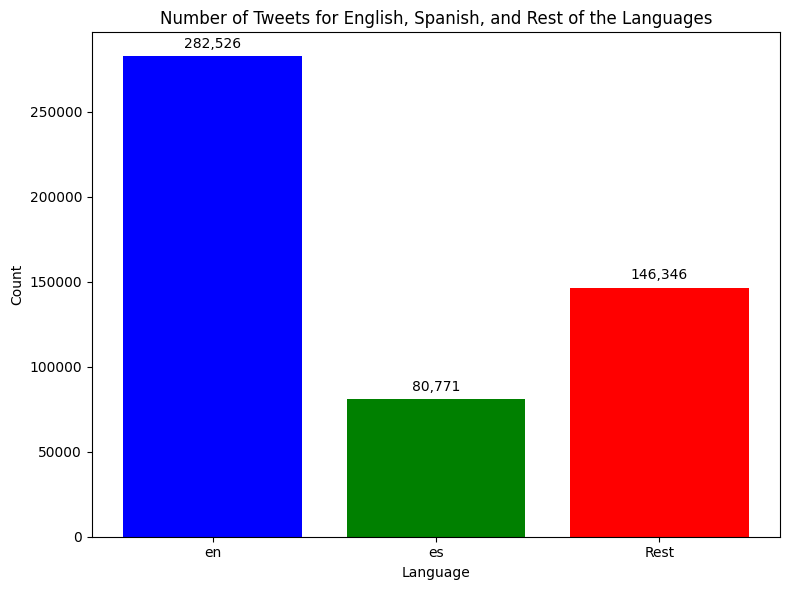

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming lang_counts is the dictionary containing language counts

# Create a DataFrame from lang_counts dictionary
df_lang_counts = pd.DataFrame(list(langcounts.items()), columns=['Language', 'Count'])

# Filter the DataFrame for English and Spanish
df_english_spanish = df_lang_counts[df_lang_counts['Language'].isin(['en', 'es'])]

# Calculate the count for the rest of the languages
rest_count = df_lang_counts[df_lang_counts['Language'].isin(['en', 'es']) == False]['Count'].sum()

# Create a DataFrame for the "Rest" category
df_rest = pd.DataFrame({'Language': ['Rest'], 'Count': [rest_count]})

# Concatenate the DataFrames
df_combined = pd.concat([df_english_spanish, df_rest], ignore_index=True)

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_combined['Language'], df_combined['Count'], color=['blue', 'green', 'red'])
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Number of Tweets for English, Spanish, and Rest of the Languages')

# Annotate the bars with count values
for i, count in enumerate(df_combined['Count']):
    plt.text(i, count + 5000, f"{count:,}", ha='center')

plt.tight_layout()
plt.show()

### Work for Go code

In [25]:
tweet.columns

Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text',
       'reply_to_status_id', 'reply_to_user_id', 'favourites_count',
       'retweet_count', 'country_code', 'place_full_name', 'place_type',
       'verified', 'lang'],
      dtype='object')

In [26]:
for column, dtype in tweet.dtypes.items():
    print(f"{column}: {dtype}")

status_id: int64
user_id: int64
created_at: object
screen_name: object
text: object
reply_to_status_id: float64
reply_to_user_id: float64
favourites_count: int64
retweet_count: int64
country_code: object
place_full_name: object
place_type: object
verified: bool
lang: object


In [27]:
tweet.head()

,status_id,user_id,created_at,screen_name,text,reply_to_status_id,reply_to_user_id,favourites_count,retweet_count,country_code,place_full_name,place_type,verified,lang
0,1250937015840804864,544900497,2020-04-17T00:00:00Z,_wheresmymojo,Math Formulas And Numbers On Blackboard Cloth ...,NaN,NaN,7129,0,NaN,NaN,NaN,False,en
1,1250937015744581634,127591568,2020-04-17T00:00:00Z,Huauchifm,🎯#Ahora te traemos la rueda de prensa del @Gob...,NaN,NaN,1576,0,NaN,NaN,NaN,False,es
2,1250937016428032002,127599939,2020-04-17T00:00:00Z,ZacatlanFM,🎯#Ahora te traemos la rueda de prensa del @Gob...,NaN,NaN,13860,0,NaN,NaN,NaN,False,es
3,1250937015572414464,128124996,2020-04-17T00:00:00Z,Izucar_fm,🎯#Ahora te traemos la rueda de prensa del @Gob...,NaN,NaN,610,0,NaN,NaN,NaN,False,es
4,1250937015002152961,314210521,2020-04-17T00:00:00Z,TehuacanFM,🎯#Ahora te traemos la rueda de prensa del @Gob...,NaN,NaN,4538,0,NaN,NaN,NaN,False,es


### Remove NaN

In [28]:
null_counts = tweet.isnull().sum()
print(null_counts)

status_id                  0
user_id                    0
created_at                 0
screen_name                0
text                       0
reply_to_status_id    445586
reply_to_user_id      432521
favourites_count           0
retweet_count              0
country_code          487047
place_full_name       486938
place_type            486938
verified                   0
lang                       0
dtype: int64


In [29]:
# Replace NaN values with appropriate defaults
default_values = {
    'reply_to_status_id': 0,
    'reply_to_user_id': 0,
    'country_code': '',
    'place_full_name': '',
    'place_type': '',
}

for column, default_value in default_values.items():
    tweet[column].fillna(default_value, inplace=True)


In [30]:
null_counts = tweet.isnull().sum()
print(null_counts)

status_id             0
user_id               0
created_at            0
screen_name           0
text                  0
reply_to_status_id    0
reply_to_user_id      0
favourites_count      0
retweet_count         0
country_code          0
place_full_name       0
place_type            0
verified              0
lang                  0
dtype: int64


In [31]:
for column, dtype in tweet.dtypes.items():
    print(f"{column}: {dtype}")

status_id: int64
user_id: int64
created_at: object
screen_name: object
text: object
reply_to_status_id: float64
reply_to_user_id: float64
favourites_count: int64
retweet_count: int64
country_code: object
place_full_name: object
place_type: object
verified: bool
lang: object


### Simulate sending 10 rows in the Kafka Queue

In [34]:
import pandas as pd
import requests

# Select the first 30 rows of the DataFrame
tweet_subset = tweet.head(30)

# Send each tweet as a separate POST request
for index, row in tweet_subset.iterrows():
    # Construct the tweet data in the format expected by the server
    tweet_data = {
        "status_id": int(row['status_id']),
        "user_id": int(row['user_id']),
        "created_at": str(row['created_at']),
        "screen_name": row['screen_name'],
        "text": row['text'],
        "reply_to_status_id": int(row['reply_to_status_id']),
        "reply_to_user_id": int(row['reply_to_user_id']),
        "favourites_count": int(row['favourites_count']),
        "retweet_count": int(row['retweet_count']),
        "country_code": row['country_code'],
        "place_full_name": row['place_full_name'],
        "place_type": row['place_type'],
        "verified": bool(row['verified']),
        "lang": row['lang']
    }
    
    # Make the POST request
    response = requests.post('http://localhost:8083/tweet', json=tweet_data)
    
    # Check the response status
    if response.status_code == 200:
        print(f'Tweet {index} sent successfully')
    else:
        print(f'Error sending tweet {index}: {response.text}')


Tweet 0 sent successfully
Tweet 1 sent successfully
Tweet 2 sent successfully
Tweet 3 sent successfully
Tweet 4 sent successfully
Tweet 5 sent successfully
Tweet 6 sent successfully
Tweet 7 sent successfully
Tweet 8 sent successfully
Tweet 9 sent successfully
Tweet 10 sent successfully
Tweet 11 sent successfully
Tweet 12 sent successfully
Tweet 13 sent successfully
Tweet 14 sent successfully
Tweet 15 sent successfully
Tweet 16 sent successfully
Tweet 17 sent successfully
Tweet 18 sent successfully
Tweet 19 sent successfully
Tweet 20 sent successfully
Tweet 21 sent successfully
Tweet 22 sent successfully
Tweet 23 sent successfully
Tweet 24 sent successfully
Tweet 25 sent successfully
Tweet 26 sent successfully
Tweet 27 sent successfully
Tweet 28 sent successfully
Tweet 29 sent successfully


In [33]:
tweet_subset

,status_id,user_id,created_at,screen_name,text,reply_to_status_id,reply_to_user_id,favourites_count,retweet_count,country_code,place_full_name,place_type,verified,lang
0,1250937015840804864,544900497,2020-04-17T00:00:00Z,_wheresmymojo,Math Formulas And Numbers On Blackboard Cloth ...,0.0,0.0,7129,0,,,,False,en
1,1250937015744581634,127591568,2020-04-17T00:00:00Z,Huauchifm,🎯#Ahora te traemos la rueda de prensa del @Gob...,0.0,0.0,1576,0,,,,False,es
2,1250937016428032002,127599939,2020-04-17T00:00:00Z,ZacatlanFM,🎯#Ahora te traemos la rueda de prensa del @Gob...,0.0,0.0,13860,0,,,,False,es
3,1250937015572414464,128124996,2020-04-17T00:00:00Z,Izucar_fm,🎯#Ahora te traemos la rueda de prensa del @Gob...,0.0,0.0,610,0,,,,False,es
4,1250937015002152961,314210521,2020-04-17T00:00:00Z,TehuacanFM,🎯#Ahora te traemos la rueda de prensa del @Gob...,0.0,0.0,4538,0,,,,False,es
5,1250937017627627520,314224537,2020-04-17T00:00:00Z,LibresFM,🎯#Ahora te traemos la rueda de prensa del @Gob...,0.0,0.0,301,0,,,,False,es
6,1250937016075739136,305084068,2020-04-17T00:00:00Z,TeziutlanFM,🎯#Ahora te traemos la rueda de prensa del @Gob...,0.0,0.0,222,0,,,,False,es
7,1250937016256212992,1133047963939409922,2020-04-17T00:00:00Z,ZacatlanTV,🎯#Ahora te traemos la rueda de prensa del @Gob...,0.0,0.0,95,0,,,,False,es
8,1250937014490365957,339248908,2020-04-17T00:00:00Z,acatlan_fm,🎯#Ahora te traemos la rueda de prensa del @Gob...,0.0,0.0,21,0,,,,False,es
9,1250937014951821315,1042498579909107712,2020-04-17T00:00:00Z,ContraReplicaMX,"En lo que ha transcurrido del 2020, el 86.8% d...",0.0,0.0,5756,1,,,,False,es
